# Lecture 14 - Searching

## Overview, Objectives, and Key Terms
 
In this lecture and [Lecture 15](ME400_Lecture_15.ipynb), we tackle two of the most important practical problems in computing: *searching* and *sorting*.  We'll start with *searching* in this lecture because it is the simpler problem, but efficient searching depends on sorted values.  Along the way, algorithms will be classified by their *order*, a way to describe how good (or bad) an algorithm is for problems of different sizes.

### Objectives

By the end of this lesson, you should be able to

- Search an array of numbers using a linear search.
- Search an array of numbers using a binary search.
- Describe what is meant by order and use it to compare algorithms
- Perform simple, numerical experiments to confirm the order of an algorithm


### Key Terms

- linear search
- binary search
- `time.time()`
- numerical experiment
- order
- $\mathcal{O}$ (big-O) notation

## The Basic, Linear Search

**The Problem**: given a sequence of values, find the location of the element in the sequence equal to some value of interest. 

**Question**: Does order matter?  

```
"""Algorithm for linear search of an unsorted sequence"""
Input: a, n, v # sequence, number elements, value of interest
Set location = Not found
Set i = 0
While i < n
    If a[i] == v then
        Set location = i
        Break  # stealing an idea from the Python we've learned
Output: location
```

Note that `a[i] == v` must have meaning.  Is that always true?

**Exercise**: Implement this algorithm in Python and test with sequence `[2, 6, 1, 7, 3]` and value `7`.

## When Searching for Equality is Not Enough

What if one wants to find....

- The location of an element in a sequence equal to some value or, *if not found*.

- The location of the value that is closest to but less than the value of interest.  **Sorted elements are needed**

Those algorithms will be studied next time, but an easy way to sort a sequence is with the `sorted()` function:

In [1]:
sorted([2, 1, 3, 5, 4])

[1, 2, 3, 4, 5]

Hence, we can modify somewhat the pseudocode to search sorted values and to find the first element equal to (or the first element greater than) a value of interest:


```
"""Algorithm for linear search of a sorted sequence"""
Input: a, n, v # sorted sequence, number elements, value of interest
Set location = n - 1
Set i = 0
While i < n 
    If a[i] >= v then
        Set location = i
        Break
    Set i = i + 1
Output: location
```

**Seeking two volunteers for...**

- `a = [1, 5, 8, 11, 18]` and `v = 8`
- `a = [1, 5, 8, 11, 18]` and `v = 17`

Show `i`, `a[i]`, and `location` *before* `i` is updated in the loop.

As a Python function:

In [2]:
def linear_search(a, v):
    """Search a sorted sequence for value v. Return nearest 
       index to right (or last position) if not found.
    """
    location = len(a) - 1
    i = 0
    while i < len(a):   
        if a[i] >= v:
            location = i
            break
        i += 1
    return location

**Exercise**: Modify the `linear_search` algorithm to accept a third argument `compare`, which should be a function that accepts two arguments.  For a sequence `a` and value `v`, `compare(a[i], v)` should return `True` if `a[i]` is greater than or equal to `v` and `False` otherwise.  Test your modified search function with `compare = lambda x, y: x[1] > y[1]`,  `a = [(1, 2), (4, 3), (1, 9), (4, 11)]` and `v = (1, 9)`.


## A Bit About Order

Why call linear search *linear*? 

- elements are looked at in order; usually, that's called *sequential* but *linear* seems okay

- the number of comparisons (e.g., `a[i] > v`) requires depends linearly on the number of elements, i.e., the number is proportional to $n$.

The fancy way to say it: 
 - **order n** 
 - $\mathcal{O}(n)$ (this is "Big O" notation)

The computational cost of an algorithm (time and, sometimes, memory) is often proportional to its order.  **Smaller order means a faster algorithm.**

## Binary Search

**Linear search** is easy to understand and easy to implement, but is it what you use to search sorted data?


Better approach (for sorted data): check the middle of the sequence to decide in which half the value must live (if it does).  Check the middle of the new half, and repeat.

The process just described is the basic idea of **binary search** and is the simplest of **divide and conquer** algorithms.

### The basic algorithm

```
"""Algorithm for binary search of a sorted sequence"""
Input: a, n, v # sorted sequence, its length, and value
Set location = Not Found
Set L = 0           
Set R = n - 1
While L <= R
    Set C = (L + R) // 2 
    If v == a[C] then
        Set location = C
        Break
    If v < a[C] then
        Set R = C - 1
    If v > a[C] then
        Set L = C + 1
Output: location
```

**Exercise**: Step through this algorithm for `a = [1, 3, 7, 9, 11]` and `v = 3`.  We know that `L = 0` and `R = 4` before the loop begins.  What are `L` and `R` after one time through the loop?  Twice?  Three times?  If it helps, you can add `Set counter = 0` before the `While` and increment it.  Then, trace the values of `counter`, `L`, `R`, and `C` at each iteration.  **Volunteer???**

### Back to Order

Binary search is $\mathcal{O}(\log n)$. 

In [3]:
def binary_search(a, v):
    location = False
    L = 0           
    R = len(a) - 1
    while L <= R:
        C = (L + R) // 2 
        if v == a[C]:
            location = C
            break
        if v < a[C]:
            R = C - 1
        if v > a[C]:
            L = C + 1
    return location

**Numerical experiments** are a great way to investigate algorithms and their performance.  To test search algorithms, we need:
 - random arrays
 - (and/or) random value to search
 - arrays of different sizes
 - a way to record how long it takes to search

In [4]:
import time
import numpy as np
def run_experiment(sizes):
    t_lin = np.zeros(len(sizes))
    t_bin = np.zeros(len(sizes))
    for i in range(len(sizes)):
        a = np.arange(sizes[i]) # always sorted
        v = np.random.randint(0, sizes[i])
        # linear
        t0 = time.time()
        linear_search(a, v)
        t_lin[i] = time.time() - t0
        # binary
        t0 = time.time()
        binary_search(a, v)
        t_bin[i] = time.time() - t0
    return t_lin, t_bin

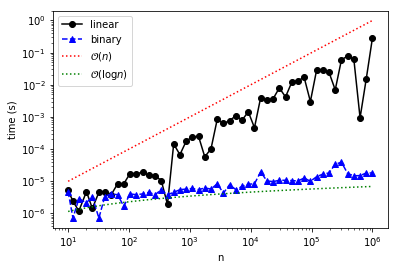

In [5]:
import matplotlib.pyplot as plt
n = np.array(list(map(int, np.logspace(1, 6))))
t_lin, t_bin = run_experiment(n)
plt.loglog(n, t_lin, 'k-o', label='linear')
plt.loglog(n, t_bin, 'b--^', label='binary')
plt.loglog(n, 1e-6*n, 'r:', label='$\mathcal{O}(n)$')
plt.loglog(n, 0.5e-6*np.log(n), 'g:', label='$\mathcal{O}(\log n)$')
plt.xlabel('n')
plt.ylabel('time (s)')
plt.legend()
plt.show()

## Recap

By now, you should be able to

- Search an array of numbers using a linear search.
- Search an array of numbers using a binary search.
- Describe what is meant by order and use it to compare algorithms
- Perform simple, numerical experiments to confirm the order of an algorithm

**Note on office hours**: I have a meeting 2:30 to 3:00, and I have to leave by 3:45.  John (Ward 133) can take questions before and after until 4 pm.